# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f7bdb418860>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/tetra_one_species.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()


['default_assoc', 1.0]
['max_subunits', 4]
['max_interactions', 3]
['monomer_add_only', False]
Using multiGraph
['A']
Parsing rule...
['A(a)+A(a)<->A(a!1).A(a!1)', 'G=-20']
['A', 'A', '']
['A(a)+A(a)', 'A(a!1).A(a!1)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7bd832ec18>, 'copies': tensor([200.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7bd832ec18>, 'copies': tensor([200.], dtype=torch.float64), 'subunits': 1})
-----
{'A'}
{'A'}
set()
Steric hindrance detected
Adding another subunit
Orig edges:  []
Nextn edges:  []
Item edges:  []
Allowed edges: 
('A', 'A')
############################3
[]
Connected item Edges:  [('A', 'A')]
New node added--1
['A']
Adding an new edge-- 0 1
New bonds:  [('A', 'A')]
Adding an new edge-- 0 1
New node added--2
[0, 1]
Trying internal bonds
Allowed edges: 
('A', 'A')
############################3
[(1, {'struct': <networkx.classes.mult

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n)
    print(gtostr(rn.network.nodes[n]['struct']))
    print(rn.network.nodes[n]['struct'].edges())
    print(rn.network.nodes[n])
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

0
A
[]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7bd832ec18>, 'copies': tensor([200.], dtype=torch.float64), 'subunits': 1}
1
A
[('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7bd832eef0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2}
2
A
[('A', 'A'), ('A', 'A'), ('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7b4542cdd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 3}
3
A
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f7b44636828>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 4}
{(0, 1): 0, (0, 2): 1, (0, 3): 3, (1, 2): 1, (1, 3): 2, (2, 3): 3}


A -- 0
[]
AA -- 1
[('A', 'A')]
AAAA -- 2
[('A', 'A'), ('A', 'A'), ('A', 'A')]
AAAAAAA -- 3
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
{2: {'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 1}, 3: {'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-80.], dtype=torch.float64), 'uid': 2}}


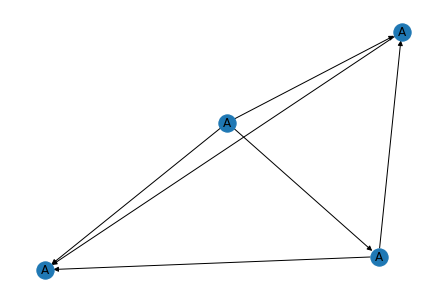

In [5]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
nx.draw(rn.network, labels=labels)

for node in rn.network.nodes(data=True):
    st = gtostr(node[1]['struct'])
    n_edges = node[1]['struct'].number_of_edges()
#     st1 = [set(i) for i in node[1]['struct'].edges()]
#     a=[]
#     for i in st1:
#         a+=list(i) 
    
    if n_edges >= len(set(st)):
        st= st+n_edges*st
    print(st,"--",node[0])
#     print("".join(a), "--",node[0])
    print(node[1]['struct'].edges())
    
print(rn.network[1]) 

In [6]:
# def _equal(n1, n2) -> bool:
#     """
#     Test whether two structures have identical connectivity
#     :param n1: nx.Graph
#     :param n2: nx.Graph
#     :return: Boolean indicating whether or not graphs are equal
#     """
#     nm = nx.algorithms.isomorphism.categorical_node_match("label", None)
#     int_n1 = nx.convert_node_labels_to_integers(n1, label_attribute="label")
#     int_n2 = nx.convert_node_labels_to_integers(n2, label_attribute="label")
#     print(int_n1)
#     print(int_n2)
#     return nx.is_isomorphic(int_n1, int_n2, node_match=nm)

# repeat_units=False
# import networkx as nx
# for i in range(len(rn.network.nodes)):
#     for (u,v) in rn.network.nodes[i]['struct'].edges:
#         if u==v:
#             repeat_units=True
#             print(repeat_units)
#         print(u,v)
#     print(i)

# # orig = rn.network.nodes[0]['struct']
# # orig = nx.relabel_nodes(orig,{'A':'AA'})
# # orig.add_edge('A','AA')
# # print(orig.nodes.data)

# # print(orig.nodes)

# # node_exists = [x for x in rn.network.nodes(data=True) if
# #                        _equal(x[1]['struct'], orig)]

# # print(node_exists)

In [7]:
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = [1.0,1.0,1.0,1.0]*np.array([1e0])  #Poor yield Simruntime = 1sec

update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
vec_rn = VectorizedRxnNet(rn, dev='cpu')
print(vec_rn.kon)

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-80.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 1}
{'k_on': 1

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [8]:
# vec_rn.update_reaction_net(rn,1)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [9]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# for n in rn.network.nodes():
#     #print(n)
#     #print(rn.network.nodes()[n])
#     for k,v in rn.network[n].items():
#         uid = v['uid']
#         r1 = set(gtostr(rn.network.nodes[n]['struct']))
#         p = set(gtostr(rn.network.nodes[k]['struct']))
#         r2 = p-r1
#         reactants = (r1,r2)
#         uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off'],'uid':uid}
#         if uid not in uid_dict.keys():
#             uid_dict[uid] = uid_val
#     print(gtostr(rn.network.nodes[n]['struct']))
#     #for r_set in rn.get_reactant_sets(n):
#     #    print(tuple(r_set))
#     #print(rn.network[n]['struct'])
# ind_sort = np.argsort(vec_rn.kon.detach().numpy())
# for i in ind_sort:
#     print(vec_rn.kon[i])
#     print(uid_dict[i])

In [10]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor
# import torch

# node_map = {}
# for node in rn.network.nodes():
#     node_map[gtostr(rn.network.nodes[node]['struct'])] = node

# print(node_map)

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         if len(edges)==0:
#             return(False)
#         kon_max = -1
#         next_node = -1
        
#         kon_sum = 0
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']
#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*solution[edge[1]] - temp_kon*(solution[edge[0]])*(solution[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Free Energy: ",vec_rn.rxn_score_vec[uid])
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(solution[edge[0]])*(solution[node_map[react]])- koff*solution[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}

# if solution != None:
#     for n in rn.network.nodes():

#         n_str = gtostr(rn.network.nodes[n]['struct']) 

#         paths = [n_str]
#         kon_sum = 0
#         temp_node = n
#         max_edge = True
#         consumption_rate = 0
#         if n < len(rn.network.nodes()):#num_monomers:
#     #         print("Current node: ")
#     #         print(n_str)
#             while max_edge:
#                 max_edge = get_max_edge(temp_node)
#                 if max_edge:
#                     total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
#                     temp_node = max_edge[1]
#                     kon_sum += max_edge[0].item()


#     #                 print("Next node: ")
#     #                 print(temp_node)

#                     paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#                 else:
#                     break
#             pathway.append(paths)
#             kon_sumarray.append(kon_sum)
#             paths=[]

#         print("-------------------------------------------------------------------------------")
#         print("-------------------------------------------------------------------------------")
#         print("|                                                                             |")
#         node_flux = get_node_flux(n)
#         net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#         print("|                                                                             |")
#         print("-------------------------------------------------------------------------------")
#         print("-------------------------------------------------------------------------------")

#     print(pathway)
#     print(kon_sumarray)
#     #print(total_con_rate)

In [11]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [12]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)



## Using the optimizer with a 1 second simulation runtime ##

In [13]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=new_kon[0]/1e2,
                  device='cpu',method="Adam")
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1., 1., 1., 1.], dtype=torch.float64, requires_grad=True)]
Using CPU
Next time:  tensor(545.7036, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 0 was 19.3%
current params: tensor([1.0100, 0.9900, 1.0100, 1.0100], dtype=torch.float64)
Using CPU
Next time:  tensor(536.8183, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1 was 19.4%
current params: tensor([1.0200, 0.9800, 1.0200, 1.0200], dtype=torch.float64)
Using CPU
Next time:  tensor(528.3084, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2 was 19.5%
current params: tensor([1.0300, 0.9700, 1.0300, 1.0300], dtype=torch.float64)
Using CPU
Next time:  tensor(520.1481, dtype=torch.float64, grad_fn=<AddBackward0>)


current params: tensor([1.3369, 0.6676, 1.3137, 1.3104], dtype=torch.float64)
Using CPU
Next time:  tensor(368.6639, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 33 was 22.0%
current params: tensor([1.3473, 0.6574, 1.3223, 1.3188], dtype=torch.float64)
Using CPU
Next time:  tensor(365.4263, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 34 was 22.1%
current params: tensor([1.3578, 0.6473, 1.3308, 1.3271], dtype=torch.float64)
Using CPU
Next time:  tensor(362.2559, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 35 was 22.1%
current params: tensor([1.3683, 0.6372, 1.3391, 1.3352], dtype=torch.float64)
Using CPU
Next time:  tensor(359.1502, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.


current params: tensor([1.6893, 0.3409, 1.5414, 1.5372], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0900, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 66 was 23.8%
current params: tensor([1.7002, 0.3317, 1.5461, 1.5423], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4636e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 67 was 23.9%
current params: tensor([1.7112, 0.3223, 1.5509, 1.5474], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6644e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 68 was 23.9%
current params: tensor([1.7221, 0.3128, 1.5557, 1.5525], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8879e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulati

current params: tensor([2.0563, 0.1335, 1.6440, 1.6557], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1207, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 99 was 24.6%
current params: tensor([2.0677, 0.1390, 1.6453, 1.6577], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0531, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 100 was 24.6%
current params: tensor([2.0791, 0.1439, 1.6467, 1.6596], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9966, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 101 was 24.6%
current params: tensor([2.0904, 0.1484, 1.6480, 1.6615], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9490, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield 

current params: tensor([2.4271, 0.1806, 1.6923, 1.7253], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0599e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 132 was 24.5%
current params: tensor([2.4381, 0.1805, 1.6939, 1.7275], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0617e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 133 was 24.5%
current params: tensor([2.4492, 0.1803, 1.6955, 1.7298], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0638e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 134 was 24.5%
current params: tensor([2.4603, 0.1801, 1.6971, 1.7321], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0662e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.1935e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 163 was 24.5%
current params: tensor([2.7796, 0.1708, 1.7431, 1.7977], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1994e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 164 was 24.5%
current params: tensor([2.7906, 0.1704, 1.7446, 1.7999], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2053e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 165 was 24.5%
current params: tensor([2.8015, 0.1700, 1.7462, 1.8021], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2113e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 166 was 24.5%
current params: tensor([2.8125, 0.1696, 

Next time:  tensor(1.4143e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 195 was 24.6%
current params: tensor([3.1289, 0.1583, 1.7905, 1.8656], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4223e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 196 was 24.6%
current params: tensor([3.1398, 0.1579, 1.7919, 1.8676], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4304e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 197 was 24.6%
current params: tensor([3.1506, 0.1575, 1.7933, 1.8696], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4386e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 198 was 24.6%
current params: tensor([3.1615, 0.1571, 

Next time:  tensor(1.6169e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 227 was 24.6%
current params: tensor([3.4754, 0.1452, 1.8333, 1.9274], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6216e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 228 was 24.6%
current params: tensor([3.4862, 0.1447, 1.8346, 1.9293], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6262e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 229 was 24.6%
current params: tensor([3.4970, 0.1443, 1.8359, 1.9311], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6309e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 230 was 24.6%
current params: tensor([3.5078, 0.1439, 

Next time:  tensor(1.7826e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 259 was 24.6%
current params: tensor([3.8196, 0.1316, 1.8715, 1.9833], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7884e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 260 was 24.6%
current params: tensor([3.8303, 0.1312, 1.8726, 1.9850], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7943e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 261 was 24.6%
current params: tensor([3.8410, 0.1308, 1.8737, 1.9866], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8002e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 262 was 24.6%
current params: tensor([3.8517, 0.1303, 

current params: tensor([4.1509, 0.1181, 1.9041, 2.0318], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9928e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 291 was 24.7%
current params: tensor([4.1616, 0.1177, 1.9051, 2.0332], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0003e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 292 was 24.7%
current params: tensor([4.1722, 0.1172, 1.9060, 2.0347], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0078e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 293 was 24.7%
current params: tensor([4.1829, 0.1168, 1.9070, 2.0362], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0154e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

current params: tensor([4.4912, 0.1038, 1.9335, 2.0761], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2676e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 323 was 24.7%
current params: tensor([4.5018, 0.1034, 1.9343, 2.0774], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2775e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 324 was 24.7%
current params: tensor([4.5124, 0.1029, 1.9352, 2.0786], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2875e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 325 was 24.7%
current params: tensor([4.5230, 0.1024, 1.9360, 2.0799], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2977e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(8.4551e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 354 was 24.5%
current params: tensor([4.8296, 0.2086, 1.9695, 2.1250], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3817e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 355 was 24.5%
current params: tensor([4.8402, 0.2094, 1.9713, 2.1270], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3203e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 356 was 24.5%
current params: tensor([4.8507, 0.2101, 1.9731, 2.1291], dtype=torch.float64)
Using CPU
Next time:  tensor(8.2693e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 357 was 24.5%
current params: tensor([4.8612, 0.2107, 

current params: tensor([5.1559, 0.2089, 2.0301, 2.1933], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6159e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 386 was 24.5%
current params: tensor([5.1664, 0.2086, 2.0321, 2.1955], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6518e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 387 was 24.5%
current params: tensor([5.1769, 0.2083, 2.0341, 2.1977], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6882e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 388 was 24.5%
current params: tensor([5.1874, 0.2080, 2.0361, 2.1999], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7251e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(9.9037e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 417 was 24.5%
current params: tensor([5.4915, 0.1979, 2.0913, 2.2621], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9498e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 418 was 24.5%
current params: tensor([5.5019, 0.1976, 2.0932, 2.2642], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9962e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 419 was 24.5%
current params: tensor([5.5124, 0.1972, 2.0950, 2.2663], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0043e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 420 was 24.5%
current params: tensor([5.5228, 0.1969, 

current params: tensor([5.8153, 0.1869, 2.1448, 2.3237], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1511e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 449 was 24.5%
current params: tensor([5.8258, 0.1865, 2.1464, 2.3256], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1566e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 450 was 24.5%
current params: tensor([5.8362, 0.1861, 2.1481, 2.3275], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1621e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 451 was 24.6%
current params: tensor([5.8466, 0.1858, 2.1497, 2.3294], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1676e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.3367e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 480 was 24.6%
current params: tensor([6.1486, 0.1754, 2.1945, 2.3822], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3419e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 481 was 24.6%
current params: tensor([6.1590, 0.1751, 2.1959, 2.3840], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3446e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 482 was 24.6%
current params: tensor([6.1694, 0.1747, 2.1974, 2.3857], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3474e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 483 was 24.6%
current params: tensor([6.1798, 0.1743, 

current params: tensor([6.4706, 0.1643, 2.2379, 2.4343], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4327e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 512 was 24.6%
current params: tensor([6.4810, 0.1639, 2.2392, 2.4360], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4358e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 513 was 24.6%
current params: tensor([6.4914, 0.1636, 2.2405, 2.4376], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4390e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 514 was 24.6%
current params: tensor([6.5017, 0.1632, 2.2419, 2.4392], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4421e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.5372e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 543 was 24.6%
current params: tensor([6.8022, 0.1528, 2.2784, 2.4838], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5408e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 544 was 24.6%
current params: tensor([6.8125, 0.1524, 2.2796, 2.4852], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5445e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 545 was 24.6%
current params: tensor([6.8229, 0.1520, 2.2808, 2.4867], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5482e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 546 was 24.6%
current params: tensor([6.8332, 0.1517, 

current params: tensor([7.1226, 0.1415, 2.3139, 2.5276], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6634e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 575 was 24.7%
current params: tensor([7.1330, 0.1411, 2.3150, 2.5290], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6677e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 576 was 24.7%
current params: tensor([7.1433, 0.1408, 2.3161, 2.5303], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6720e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 577 was 24.7%
current params: tensor([7.1536, 0.1404, 2.3172, 2.5317], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6763e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.8085e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 606 was 24.7%
current params: tensor([7.4528, 0.1298, 2.3470, 2.5689], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8136e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 607 was 24.7%
current params: tensor([7.4631, 0.1294, 2.3479, 2.5702], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8187e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 608 was 24.7%
current params: tensor([7.4734, 0.1291, 2.3489, 2.5714], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8239e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 609 was 24.7%
current params: tensor([7.4837, 0.1287, 

current params: tensor([7.7720, 0.1183, 2.3758, 2.6052], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9894e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 638 was 24.7%
current params: tensor([7.7823, 0.1179, 2.3766, 2.6063], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9956e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 639 was 24.7%
current params: tensor([7.7926, 0.1176, 2.3775, 2.6075], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0020e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 640 was 24.7%
current params: tensor([7.8028, 0.1172, 2.3784, 2.6086], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0083e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(2.2056e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 669 was 24.8%
current params: tensor([8.1009, 0.1063, 2.4023, 2.6390], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2134e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 670 was 24.8%
current params: tensor([8.1112, 0.1060, 2.4031, 2.6400], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2212e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 671 was 24.8%
current params: tensor([8.1215, 0.1056, 2.4039, 2.6410], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2292e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 672 was 24.8%
current params: tensor([8.1317, 0.1052, 

current params: tensor([8.4294, 0.2144, 2.4296, 2.6726], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9930e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 702 was 24.5%
current params: tensor([8.4397, 0.2172, 2.4310, 2.6741], dtype=torch.float64)
Using CPU
Next time:  tensor(9.7357e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 703 was 24.5%
current params: tensor([8.4499, 0.2197, 2.4323, 2.6755], dtype=torch.float64)
Using CPU
Next time:  tensor(9.5156e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 704 was 24.5%
current params: tensor([8.4602, 0.2219, 2.4337, 2.6771], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3270e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(8.4607e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 733 was 24.5%
current params: tensor([8.7577, 0.2349, 2.4840, 2.7285], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4810e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 734 was 24.5%
current params: tensor([8.7680, 0.2347, 2.4859, 2.7303], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5023e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 735 was 24.5%
current params: tensor([8.7783, 0.2345, 2.4877, 2.7322], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5244e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 736 was 24.5%
current params: tensor([8.7885, 0.2343, 

current params: tensor([9.0755, 0.2265, 2.5409, 2.7856], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3613e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 765 was 24.5%
current params: tensor([9.0857, 0.2262, 2.5427, 2.7874], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3938e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 766 was 24.5%
current params: tensor([9.0959, 0.2259, 2.5444, 2.7892], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4265e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 767 was 24.5%
current params: tensor([9.1062, 0.2256, 2.5462, 2.7910], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4594e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.0479e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 797 was 24.6%
current params: tensor([9.4131, 0.2164, 2.5974, 2.8433], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0516e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 798 was 24.6%
current params: tensor([9.4234, 0.2161, 2.5990, 2.8450], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0554e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 799 was 24.6%
current params: tensor([9.4336, 0.2157, 2.6007, 2.8467], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0592e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 800 was 24.6%
current params: tensor([9.4438, 0.2154, 

current params: tensor([9.7299, 0.2068, 2.6465, 2.8943], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1380e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 829 was 24.6%
current params: tensor([9.7401, 0.2065, 2.6480, 2.8959], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1397e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 830 was 24.6%
current params: tensor([9.7503, 0.2062, 2.6496, 2.8975], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1414e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 831 was 24.6%
current params: tensor([9.7605, 0.2059, 2.6511, 2.8991], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1431e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

current params: tensor([10.0564,  0.1970,  2.6936,  2.9439], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1949e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 861 was 24.6%
current params: tensor([10.0666,  0.1967,  2.6950,  2.9454], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1968e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 862 was 24.6%
current params: tensor([10.0768,  0.1964,  2.6964,  2.9469], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1987e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 863 was 24.6%
current params: tensor([10.0870,  0.1961,  2.6978,  2.9484], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2005e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation r

current params: tensor([10.3724,  0.1874,  2.7359,  2.9890], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2559e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 892 was 24.6%
current params: tensor([10.3826,  0.1871,  2.7372,  2.9904], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2579e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 893 was 24.6%
current params: tensor([10.3928,  0.1868,  2.7385,  2.9918], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2600e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 894 was 24.6%
current params: tensor([10.4030,  0.1865,  2.7398,  2.9932], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2621e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation r

Next time:  tensor(1.3237e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 923 was 24.7%
current params: tensor([10.6982,  0.1775,  2.7765,  3.0328], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3260e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 924 was 24.7%
current params: tensor([10.7084,  0.1772,  2.7778,  3.0341], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3283e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 925 was 24.7%
current params: tensor([10.7186,  0.1769,  2.7790,  3.0354], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3306e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 926 was 24.7%
current params: tensor([10.7

current params: tensor([11.0136,  0.1679,  2.8131,  3.0725], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4022e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 955 was 24.7%
current params: tensor([11.0237,  0.1676,  2.8143,  3.0738], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4048e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 956 was 24.7%
current params: tensor([11.0339,  0.1672,  2.8154,  3.0750], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4075e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 957 was 24.7%
current params: tensor([11.0441,  0.1669,  2.8165,  3.0762], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4101e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation r

current params: tensor([11.3388,  0.1578,  2.8482,  3.1109], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4913e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 987 was 24.7%
current params: tensor([11.3489,  0.1575,  2.8493,  3.1121], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4942e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 988 was 24.7%
current params: tensor([11.3591,  0.1572,  2.8503,  3.1132], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4972e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 989 was 24.7%
current params: tensor([11.3692,  0.1569,  2.8514,  3.1144], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5002e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation r

current params: tensor([11.6535,  0.1481,  2.8798,  3.1456], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5897e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1018 was 24.7%
current params: tensor([11.6637,  0.1477,  2.8807,  3.1467], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5932e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1019 was 24.7%
current params: tensor([11.6738,  0.1474,  2.8817,  3.1478], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5966e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1020 was 24.7%
current params: tensor([11.6840,  0.1471,  2.8827,  3.1489], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6000e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.7031e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1049 was 24.7%
current params: tensor([11.9782,  0.1379,  2.9099,  3.1789], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7070e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1050 was 24.7%
current params: tensor([11.9884,  0.1376,  2.9108,  3.1799], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7110e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1051 was 24.7%
current params: tensor([11.9985,  0.1373,  2.9117,  3.1809], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7150e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1052 was 24.7%
current params: tensor([

Next time:  tensor(1.8350e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1080 was 24.8%
current params: tensor([12.2925,  0.1280,  2.9368,  3.2088], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8396e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1081 was 24.8%
current params: tensor([12.3026,  0.1276,  2.9376,  3.2097], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8443e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1082 was 24.8%
current params: tensor([12.3128,  0.1273,  2.9384,  3.2107], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8489e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1083 was 24.8%
current params: tensor([

current params: tensor([12.6066,  0.1179,  2.9615,  3.2364], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9961e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1112 was 24.8%
current params: tensor([12.6167,  0.1176,  2.9623,  3.2372], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0016e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1113 was 24.8%
current params: tensor([12.6268,  0.1173,  2.9631,  3.2381], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0072e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1114 was 24.8%
current params: tensor([12.6370,  0.1169,  2.9638,  3.2389], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0128e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(2.1837e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1143 was 24.8%
current params: tensor([12.9306,  0.1075,  2.9849,  3.2624], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1903e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1144 was 24.8%
current params: tensor([12.9407,  0.1071,  2.9856,  3.2632], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1971e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1145 was 24.8%
current params: tensor([12.9508,  0.1068,  2.9863,  3.2639], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2038e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1146 was 24.8%
current params: tensor([

current params: tensor([13.2442,  0.1948,  3.0061,  3.2860], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2083e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1175 was 24.7%
current params: tensor([13.2544,  0.2019,  3.0070,  3.2869], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1658e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1176 was 24.7%
current params: tensor([13.2645,  0.2083,  3.0080,  3.2879], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1302e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1177 was 24.6%
current params: tensor([13.2746,  0.2140,  3.0090,  3.2889], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1000e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.9155e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1206 was 24.6%
current params: tensor([13.5682,  0.2579,  3.0511,  3.3295], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9189e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1207 was 24.6%
current params: tensor([13.5783,  0.2579,  3.0528,  3.3311], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9243e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1208 was 24.6%
current params: tensor([13.5885,  0.2579,  3.0545,  3.3327], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9315e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1209 was 24.6%
current params: tensor([

current params: tensor([13.8820,  0.2522,  3.1044,  3.3791], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3340e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1238 was 24.6%
current params: tensor([13.8922,  0.2519,  3.1061,  3.3807], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3435e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1239 was 24.6%
current params: tensor([13.9023,  0.2517,  3.1078,  3.3823], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3530e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1240 was 24.6%
current params: tensor([13.9124,  0.2514,  3.1095,  3.3839], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3625e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.6451e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1269 was 24.6%
current params: tensor([14.2058,  0.2438,  3.1574,  3.4290], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6556e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1270 was 24.6%
current params: tensor([14.2159,  0.2435,  3.1590,  3.4305], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6661e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1271 was 24.6%
current params: tensor([14.2260,  0.2432,  3.1606,  3.4320], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6767e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1272 was 24.6%
current params: tensor([

Next time:  tensor(9.9824e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1300 was 24.6%
current params: tensor([14.5192,  0.2355,  3.2061,  3.4752], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9937e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1301 was 24.6%
current params: tensor([14.5293,  0.2353,  3.2077,  3.4767], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0005e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1302 was 24.6%
current params: tensor([14.5394,  0.2350,  3.2092,  3.4781], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0016e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1303 was 24.6%
current params: tensor([

current params: tensor([14.8324,  0.2273,  3.2524,  3.5195], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0358e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1332 was 24.6%
current params: tensor([14.8425,  0.2270,  3.2538,  3.5209], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0370e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1333 was 24.6%
current params: tensor([14.8526,  0.2267,  3.2553,  3.5223], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0382e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1334 was 24.6%
current params: tensor([14.8627,  0.2265,  3.2567,  3.5237], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0394e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.0750e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1363 was 24.7%
current params: tensor([15.1556,  0.2187,  3.2976,  3.5632], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0764e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1364 was 24.7%
current params: tensor([15.1657,  0.2184,  3.2990,  3.5645], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0777e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1365 was 24.7%
current params: tensor([15.1758,  0.2181,  3.3003,  3.5659], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0790e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1366 was 24.7%
current params: tensor([

current params: tensor([15.4685,  0.2103,  3.3392,  3.6037], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1191e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1395 was 24.7%
current params: tensor([15.4786,  0.2101,  3.3405,  3.6049], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1205e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1396 was 24.7%
current params: tensor([15.4886,  0.2098,  3.3418,  3.6062], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1219e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1397 was 24.7%
current params: tensor([15.4987,  0.2095,  3.3431,  3.6075], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1234e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.1655e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1426 was 24.7%
current params: tensor([15.7913,  0.2017,  3.3799,  3.6435], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1671e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1427 was 24.7%
current params: tensor([15.8014,  0.2014,  3.3811,  3.6447], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1687e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1428 was 24.7%
current params: tensor([15.8115,  0.2011,  3.3824,  3.6460], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1702e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1429 was 24.7%
current params: tensor([

Next time:  tensor(1.2163e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1457 was 24.7%
current params: tensor([16.1039,  0.1933,  3.4173,  3.6804], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2180e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1458 was 24.7%
current params: tensor([16.1140,  0.1930,  3.4185,  3.6815], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2197e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1459 was 24.7%
current params: tensor([16.1241,  0.1927,  3.4196,  3.6827], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2215e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1460 was 24.7%
current params: tensor([

current params: tensor([16.4164,  0.1848,  3.4528,  3.7154], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2740e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1489 was 24.7%
current params: tensor([16.4264,  0.1845,  3.4539,  3.7165], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2759e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1490 was 24.7%
current params: tensor([16.4365,  0.1842,  3.4550,  3.7176], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2778e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1491 was 24.7%
current params: tensor([16.4466,  0.1839,  3.4561,  3.7187], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2797e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

current params: tensor([16.7287,  0.1762,  3.4864,  3.7488], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3357e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1520 was 24.7%
current params: tensor([16.7388,  0.1759,  3.4875,  3.7499], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3378e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1521 was 24.7%
current params: tensor([16.7488,  0.1757,  3.4885,  3.7509], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3399e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1522 was 24.7%
current params: tensor([16.7589,  0.1754,  3.4896,  3.7519], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3420e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.4043e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1551 was 24.7%
current params: tensor([17.0510,  0.1673,  3.5192,  3.7815], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4066e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1552 was 24.7%
current params: tensor([17.0611,  0.1671,  3.5202,  3.7825], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4090e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1553 was 24.7%
current params: tensor([17.0711,  0.1668,  3.5212,  3.7835], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4113e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1554 was 24.7%
current params: tensor([

current params: tensor([17.3631,  0.1587,  3.5493,  3.8115], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4835e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1583 was 24.8%
current params: tensor([17.3732,  0.1584,  3.5502,  3.8124], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4861e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1584 was 24.8%
current params: tensor([17.3832,  0.1581,  3.5511,  3.8133], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4888e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1585 was 24.8%
current params: tensor([17.3933,  0.1578,  3.5521,  3.8143], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4914e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

current params: tensor([17.6751,  0.1499,  3.5776,  3.8398], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5700e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1614 was 24.8%
current params: tensor([17.6852,  0.1496,  3.5785,  3.8407], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5730e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1615 was 24.8%
current params: tensor([17.6953,  0.1494,  3.5794,  3.8415], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5760e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1616 was 24.8%
current params: tensor([17.7053,  0.1491,  3.5803,  3.8424], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5790e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.6681e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1645 was 24.8%
current params: tensor([17.9971,  0.1408,  3.6051,  3.8673], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6715e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1646 was 24.8%
current params: tensor([18.0072,  0.1405,  3.6059,  3.8681], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6749e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1647 was 24.8%
current params: tensor([18.0172,  0.1403,  3.6068,  3.8689], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6783e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1648 was 24.8%
current params: tensor([

current params: tensor([18.3089,  0.1319,  3.6301,  3.8923], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7842e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1677 was 24.8%
current params: tensor([18.3190,  0.1316,  3.6308,  3.8931], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7881e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1678 was 24.8%
current params: tensor([18.3290,  0.1314,  3.6316,  3.8938], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7920e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1679 was 24.8%
current params: tensor([18.3391,  0.1311,  3.6324,  3.8946], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7960e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.9145e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1708 was 24.8%
current params: tensor([18.6307,  0.1227,  3.6541,  3.9164], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9191e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1709 was 24.8%
current params: tensor([18.6408,  0.1224,  3.6549,  3.9171], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9236e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1710 was 24.8%
current params: tensor([18.6508,  0.1221,  3.6556,  3.9178], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9282e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1711 was 24.8%
current params: tensor([

current params: tensor([18.9423,  0.1136,  3.6758,  3.9380], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0723e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1740 was 24.8%
current params: tensor([18.9524,  0.1133,  3.6765,  3.9387], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0777e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1741 was 24.8%
current params: tensor([18.9624,  0.1130,  3.6772,  3.9394], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0831e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1742 was 24.8%
current params: tensor([18.9725,  0.1127,  3.6778,  3.9400], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0885e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(2.2540e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1771 was 24.8%
current params: tensor([19.2640,  0.1041,  3.6965,  3.9587], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2605e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1772 was 24.8%
current params: tensor([19.2740,  0.1038,  3.6971,  3.9593], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2669e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1773 was 24.8%
current params: tensor([19.2841,  0.1035,  3.6978,  3.9599], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2734e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1774 was 24.8%
current params: tensor([

Next time:  tensor(9.3253e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1802 was 24.7%
current params: tensor([19.5755,  0.2558,  3.7196,  3.9811], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2033e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1803 was 24.7%
current params: tensor([19.5855,  0.2588,  3.7209,  3.9822], dtype=torch.float64)
Using CPU
Next time:  tensor(9.0970e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1804 was 24.6%
current params: tensor([19.5956,  0.2614,  3.7221,  3.9834], dtype=torch.float64)
Using CPU
Next time:  tensor(9.0041e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1805 was 24.6%
current params: tensor([

current params: tensor([19.8873,  0.2797,  3.7670,  4.0231], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4142e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1834 was 24.6%
current params: tensor([19.8973,  0.2796,  3.7686,  4.0246], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4174e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1835 was 24.6%
current params: tensor([19.9074,  0.2795,  3.7703,  4.0261], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4210e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1836 was 24.6%
current params: tensor([19.9174,  0.2794,  3.7720,  4.0275], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4248e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.5970e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1865 was 24.6%
current params: tensor([20.2091,  0.2736,  3.8205,  4.0701], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6041e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1866 was 24.6%
current params: tensor([20.2191,  0.2733,  3.8221,  4.0716], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6113e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1867 was 24.6%
current params: tensor([20.2292,  0.2731,  3.8238,  4.0730], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6185e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1868 was 24.6%
current params: tensor([

current params: tensor([20.5207,  0.2664,  3.8708,  4.1145], dtype=torch.float64)
Using CPU
Next time:  tensor(8.8349e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1897 was 24.6%
current params: tensor([20.5308,  0.2662,  3.8724,  4.1159], dtype=torch.float64)
Using CPU
Next time:  tensor(8.8426e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1898 was 24.7%
current params: tensor([20.5408,  0.2660,  3.8740,  4.1174], dtype=torch.float64)
Using CPU
Next time:  tensor(8.8503e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1899 was 24.7%
current params: tensor([20.5509,  0.2657,  3.8756,  4.1188], dtype=torch.float64)
Using CPU
Next time:  tensor(8.8581e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.0809e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1928 was 24.7%
current params: tensor([20.8423,  0.2590,  3.9208,  4.1590], dtype=torch.float64)
Using CPU
Next time:  tensor(9.0891e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1929 was 24.7%
current params: tensor([20.8524,  0.2587,  3.9223,  4.1603], dtype=torch.float64)
Using CPU
Next time:  tensor(9.0973e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1930 was 24.7%
current params: tensor([20.8624,  0.2585,  3.9239,  4.1617], dtype=torch.float64)
Using CPU
Next time:  tensor(9.1055e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1931 was 24.7%
current params: tensor([

current params: tensor([21.1538,  0.2517,  3.9674,  4.2006], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3511e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1960 was 24.7%
current params: tensor([21.1639,  0.2515,  3.9689,  4.2019], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3599e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1961 was 24.7%
current params: tensor([21.1739,  0.2512,  3.9703,  4.2032], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3686e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1962 was 24.7%
current params: tensor([21.1840,  0.2510,  3.9718,  4.2046], dtype=torch.float64)
Using CPU
Next time:  tensor(9.3774e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.6302e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1991 was 24.7%
current params: tensor([21.4753,  0.2442,  4.0136,  4.2422], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6395e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1992 was 24.7%
current params: tensor([21.4853,  0.2440,  4.0151,  4.2435], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6489e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1993 was 24.7%
current params: tensor([21.4954,  0.2437,  4.0165,  4.2447], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6582e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1994 was 24.7%
current params: tensor([

current params: tensor([21.7866,  0.2368,  4.0568,  4.2811], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9382e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2023 was 24.7%
current params: tensor([21.7966,  0.2366,  4.0581,  4.2824], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9482e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2024 was 24.7%
current params: tensor([21.8067,  0.2364,  4.0595,  4.2836], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9582e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2025 was 24.7%
current params: tensor([21.8167,  0.2361,  4.0609,  4.2848], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9682e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.0258e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2054 was 24.7%
current params: tensor([22.1079,  0.2292,  4.0996,  4.3200], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0269e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2055 was 24.7%
current params: tensor([22.1179,  0.2290,  4.1009,  4.3212], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0279e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2056 was 24.7%
current params: tensor([22.1280,  0.2287,  4.1022,  4.3224], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0290e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2057 was 24.7%
current params: tensor([

Next time:  tensor(1.0601e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2085 was 24.7%
current params: tensor([22.4191,  0.2218,  4.1395,  4.3563], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0613e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2086 was 24.7%
current params: tensor([22.4291,  0.2216,  4.1408,  4.3575], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0624e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2087 was 24.7%
current params: tensor([22.4392,  0.2213,  4.1420,  4.3586], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0636e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2088 was 24.7%
current params: tensor([

Next time:  tensor(1.0983e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2117 was 24.7%
current params: tensor([22.7402,  0.2141,  4.1791,  4.3925], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0996e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2118 was 24.7%
current params: tensor([22.7503,  0.2138,  4.1803,  4.3936], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1008e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2119 was 24.7%
current params: tensor([22.7603,  0.2136,  4.1815,  4.3947], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1021e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2120 was 24.7%
current params: tensor([

Next time:  tensor(1.1397e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2149 was 24.7%
current params: tensor([23.0613,  0.2063,  4.2171,  4.4273], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1411e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2150 was 24.7%
current params: tensor([23.0714,  0.2060,  4.2183,  4.4284], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1424e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2151 was 24.7%
current params: tensor([23.0814,  0.2058,  4.2195,  4.4295], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1438e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2152 was 24.7%
current params: tensor([

current params: tensor([23.3723,  0.1987,  4.2525,  4.4598], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1847e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2181 was 24.7%
current params: tensor([23.3824,  0.1984,  4.2536,  4.4608], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1861e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2182 was 24.7%
current params: tensor([23.3924,  0.1982,  4.2548,  4.4619], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1876e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2183 was 24.7%
current params: tensor([23.4024,  0.1980,  4.2559,  4.4629], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1891e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

current params: tensor([23.6833,  0.1910,  4.2865,  4.4911], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2322e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2212 was 24.8%
current params: tensor([23.6933,  0.1908,  4.2876,  4.4920], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2338e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2213 was 24.8%
current params: tensor([23.7034,  0.1905,  4.2886,  4.4930], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2354e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2214 was 24.8%
current params: tensor([23.7134,  0.1903,  4.2897,  4.4940], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2370e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.2840e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2243 was 24.8%
current params: tensor([24.0042,  0.1831,  4.3201,  4.5220], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2858e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2244 was 24.8%
current params: tensor([24.0143,  0.1828,  4.3211,  4.5230], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2875e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2245 was 24.8%
current params: tensor([24.0243,  0.1826,  4.3221,  4.5239], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2893e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2246 was 24.8%
current params: tensor([

current params: tensor([24.3151,  0.1753,  4.3513,  4.5507], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3428e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2275 was 24.8%
current params: tensor([24.3251,  0.1750,  4.3522,  4.5516], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3448e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2276 was 24.8%
current params: tensor([24.3351,  0.1748,  4.3532,  4.5526], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3467e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2277 was 24.8%
current params: tensor([24.3452,  0.1745,  4.3542,  4.5535], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3487e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.4058e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2306 was 24.8%
current params: tensor([24.6359,  0.1672,  4.3820,  4.5791], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4079e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2307 was 24.8%
current params: tensor([24.6460,  0.1669,  4.3829,  4.5800], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4101e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2308 was 24.8%
current params: tensor([24.6560,  0.1667,  4.3839,  4.5808], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4122e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2309 was 24.8%
current params: tensor([

current params: tensor([24.9467,  0.1593,  4.4104,  4.6053], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4779e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2338 was 24.8%
current params: tensor([24.9567,  0.1590,  4.4113,  4.6061], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4803e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2339 was 24.8%
current params: tensor([24.9667,  0.1588,  4.4122,  4.6070], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4827e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2340 was 24.8%
current params: tensor([24.9768,  0.1585,  4.4131,  4.6078], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4851e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

current params: tensor([25.2574,  0.1513,  4.4375,  4.6303], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5560e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2369 was 24.8%
current params: tensor([25.2674,  0.1510,  4.4383,  4.6311], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5587e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2370 was 24.8%
current params: tensor([25.2775,  0.1508,  4.4392,  4.6319], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5614e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2371 was 24.8%
current params: tensor([25.2875,  0.1505,  4.4400,  4.6327], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5641e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.6437e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2400 was 24.8%
current params: tensor([25.5781,  0.1429,  4.4640,  4.6548], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6467e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2401 was 24.8%
current params: tensor([25.5881,  0.1427,  4.4649,  4.6555], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6497e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2402 was 24.8%
current params: tensor([25.5982,  0.1424,  4.4657,  4.6563], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6527e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2403 was 24.8%
current params: tensor([

Next time:  tensor(1.7428e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2431 was 24.8%
current params: tensor([25.8888,  0.1348,  4.4884,  4.6772], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7462e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2432 was 24.8%
current params: tensor([25.8988,  0.1345,  4.4892,  4.6779], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7496e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2433 was 24.8%
current params: tensor([25.9088,  0.1343,  4.4899,  4.6786], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7531e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2434 was 24.8%
current params: tensor([

Next time:  tensor(1.8558e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2462 was 24.8%
current params: tensor([26.1994,  0.1266,  4.5114,  4.6984], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8597e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2463 was 24.8%
current params: tensor([26.2094,  0.1263,  4.5122,  4.6991], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8636e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2464 was 24.8%
current params: tensor([26.2194,  0.1260,  4.5129,  4.6997], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8675e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2465 was 24.8%
current params: tensor([

Next time:  tensor(1.9903e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2494 was 24.8%
current params: tensor([26.5200,  0.1180,  4.5338,  4.7189], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9949e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2495 was 24.8%
current params: tensor([26.5300,  0.1177,  4.5345,  4.7196], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9994e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2496 was 24.8%
current params: tensor([26.5400,  0.1175,  4.5352,  4.7202], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0040e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2497 was 24.8%
current params: tensor([

current params: tensor([26.8305,  0.1096,  4.5541,  4.7375], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1477e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2526 was 24.8%
current params: tensor([26.8405,  0.1093,  4.5547,  4.7381], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1530e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2527 was 24.8%
current params: tensor([26.8506,  0.1091,  4.5554,  4.7387], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1584e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2528 was 24.8%
current params: tensor([26.8606,  0.1088,  4.5560,  4.7393], dtype=torch.float64)
Using CPU
Next time:  tensor(3.2817, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation ru

Next time:  tensor(3.9011, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2557 was 24.9%
current params: tensor([27.1511,  0.1007,  4.5740,  4.7550], dtype=torch.float64)
Using CPU
Next time:  tensor(3.9281, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2558 was 24.9%
current params: tensor([27.1611,  0.1004,  4.5746,  4.7555], dtype=torch.float64)
Using CPU
Next time:  tensor(3.9555, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2559 was 24.9%
current params: tensor([27.1711,  0.1001,  4.5752,  4.7560], dtype=torch.float64)
Using CPU
Next time:  tensor(3.9833, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2560 was 24.9%
current params: tensor([27.1811,  0.0999

current params: tensor([27.4617,  0.2961,  4.6059,  4.7824], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9489e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2589 was 24.7%
current params: tensor([27.4717,  0.2971,  4.6074,  4.7837], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9241e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2590 was 24.7%
current params: tensor([27.4817,  0.2979,  4.6090,  4.7850], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9024e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2591 was 24.7%
current params: tensor([27.4917,  0.2986,  4.6106,  4.7863], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8835e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.8257e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2620 was 24.7%
current params: tensor([27.7824,  0.3006,  4.6598,  4.8275], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8298e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2621 was 24.7%
current params: tensor([27.7925,  0.3005,  4.6615,  4.8290], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8341e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2622 was 24.7%
current params: tensor([27.8025,  0.3003,  4.6633,  4.8304], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8384e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2623 was 24.7%
current params: tensor([

current params: tensor([28.0932,  0.2947,  4.7132,  4.8723], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9862e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2652 was 24.7%
current params: tensor([28.1032,  0.2945,  4.7149,  4.8737], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9917e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2653 was 24.7%
current params: tensor([28.1132,  0.2943,  4.7166,  4.8751], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9971e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2654 was 24.7%
current params: tensor([28.1232,  0.2941,  4.7183,  4.8766], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0026e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.1603e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2683 was 24.7%
current params: tensor([28.4139,  0.2882,  4.7670,  4.9175], dtype=torch.float64)
Using CPU
Next time:  tensor(8.1661e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2684 was 24.7%
current params: tensor([28.4239,  0.2880,  4.7686,  4.9189], dtype=torch.float64)
Using CPU
Next time:  tensor(8.1719e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2685 was 24.7%
current params: tensor([28.4339,  0.2878,  4.7703,  4.9203], dtype=torch.float64)
Using CPU
Next time:  tensor(8.1776e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2686 was 24.7%
current params: tensor([

current params: tensor([28.7245,  0.2819,  4.8176,  4.9604], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3498e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2715 was 24.7%
current params: tensor([28.7345,  0.2817,  4.8192,  4.9617], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3559e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2716 was 24.7%
current params: tensor([28.7446,  0.2815,  4.8208,  4.9631], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3620e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2717 was 24.7%
current params: tensor([28.7546,  0.2813,  4.8225,  4.9645], dtype=torch.float64)
Using CPU
Next time:  tensor(8.3681e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.5433e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2746 was 24.7%
current params: tensor([29.0451,  0.2753,  4.8684,  5.0035], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5497e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2747 was 24.7%
current params: tensor([29.0552,  0.2751,  4.8700,  5.0048], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5561e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2748 was 24.7%
current params: tensor([29.0652,  0.2749,  4.8716,  5.0062], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5626e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2749 was 24.7%
current params: tensor([

current params: tensor([29.3557,  0.2689,  4.9163,  5.0443], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7541e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2778 was 24.7%
current params: tensor([29.3657,  0.2687,  4.9178,  5.0456], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7609e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2779 was 24.7%
current params: tensor([29.3758,  0.2685,  4.9193,  5.0469], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7677e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2780 was 24.7%
current params: tensor([29.3858,  0.2683,  4.9208,  5.0482], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7745e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.9700e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2809 was 24.7%
current params: tensor([29.6763,  0.2622,  4.9642,  5.0854], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9772e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2810 was 24.7%
current params: tensor([29.6863,  0.2620,  4.9657,  5.0866], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9844e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2811 was 24.7%
current params: tensor([29.6963,  0.2618,  4.9672,  5.0879], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9916e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2812 was 24.7%
current params: tensor([

current params: tensor([29.9868,  0.2557,  5.0094,  5.1242], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2061e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2841 was 24.7%
current params: tensor([29.9968,  0.2555,  5.0109,  5.1254], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2137e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2842 was 24.7%
current params: tensor([30.0068,  0.2553,  5.0123,  5.1266], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2213e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2843 was 24.7%
current params: tensor([30.0168,  0.2551,  5.0137,  5.1279], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2290e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.4488e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2872 was 24.7%
current params: tensor([30.3073,  0.2489,  5.0547,  5.1632], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4569e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2873 was 24.7%
current params: tensor([30.3173,  0.2487,  5.0561,  5.1644], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4650e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2874 was 24.7%
current params: tensor([30.3273,  0.2485,  5.0575,  5.1656], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4731e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2875 was 24.7%
current params: tensor([

current params: tensor([30.6177,  0.2423,  5.0974,  5.2000], dtype=torch.float64)
Using CPU
Next time:  tensor(9.7153e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2904 was 24.7%
current params: tensor([30.6277,  0.2421,  5.0987,  5.2012], dtype=torch.float64)
Using CPU
Next time:  tensor(9.7239e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2905 was 24.7%
current params: tensor([30.6377,  0.2419,  5.1001,  5.2023], dtype=torch.float64)
Using CPU
Next time:  tensor(9.7325e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2906 was 24.7%
current params: tensor([30.6477,  0.2416,  5.1014,  5.2035], dtype=torch.float64)
Using CPU
Next time:  tensor(9.7412e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.9904e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2935 was 24.8%
current params: tensor([30.9381,  0.2354,  5.1401,  5.2370], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9996e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2936 was 24.8%
current params: tensor([30.9481,  0.2352,  5.1414,  5.2381], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0009e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2937 was 24.8%
current params: tensor([30.9582,  0.2350,  5.1427,  5.2393], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0018e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2938 was 24.8%
current params: tensor([

current params: tensor([31.2485,  0.2287,  5.1803,  5.2718], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0294e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2967 was 24.8%
current params: tensor([31.2585,  0.2285,  5.1815,  5.2729], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0304e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2968 was 24.8%
current params: tensor([31.2685,  0.2282,  5.1828,  5.2740], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0313e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2969 was 24.8%
current params: tensor([31.2786,  0.2280,  5.1841,  5.2751], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0323e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.0608e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2998 was 24.8%
current params: tensor([31.5689,  0.2217,  5.2205,  5.3068], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0619e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2999 was 24.8%
current params: tensor([31.5789,  0.2214,  5.2217,  5.3078], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0629e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3000 was 24.8%
current params: tensor([31.5889,  0.2212,  5.2229,  5.3089], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0640e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3001 was 24.8%
current params: tensor([

current params: tensor([31.8792,  0.2148,  5.2583,  5.3396], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0957e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3030 was 24.8%
current params: tensor([31.8892,  0.2146,  5.2595,  5.3407], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0968e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3031 was 24.8%
current params: tensor([31.8993,  0.2144,  5.2607,  5.3417], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0980e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3032 was 24.8%
current params: tensor([31.9093,  0.2142,  5.2618,  5.3428], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0991e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.1321e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3061 was 24.8%
current params: tensor([32.1996,  0.2077,  5.2960,  5.3725], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1333e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3062 was 24.8%
current params: tensor([32.2096,  0.2075,  5.2972,  5.3735], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1345e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3063 was 24.8%
current params: tensor([32.2196,  0.2073,  5.2983,  5.3746], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1357e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3064 was 24.8%
current params: tensor([

current params: tensor([32.5099,  0.2007,  5.3314,  5.4034], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1726e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3093 was 24.8%
current params: tensor([32.5199,  0.2005,  5.3326,  5.4044], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1739e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3094 was 24.8%
current params: tensor([32.5299,  0.2003,  5.3337,  5.4054], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1752e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3095 was 24.8%
current params: tensor([32.5399,  0.2001,  5.3348,  5.4064], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1766e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.2151e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3124 was 24.8%
current params: tensor([32.8301,  0.1935,  5.3668,  5.4343], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2166e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3125 was 24.8%
current params: tensor([32.8401,  0.1933,  5.3679,  5.4352], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2180e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3126 was 24.8%
current params: tensor([32.8502,  0.1930,  5.3690,  5.4362], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2194e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3127 was 24.8%
current params: tensor([

current params: tensor([33.1404,  0.1864,  5.3999,  5.4631], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2628e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3156 was 24.8%
current params: tensor([33.1504,  0.1862,  5.4009,  5.4640], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2644e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3157 was 24.8%
current params: tensor([33.1604,  0.1859,  5.4020,  5.4650], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2660e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3158 was 24.8%
current params: tensor([33.1704,  0.1857,  5.4030,  5.4659], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2675e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.3133e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3187 was 24.8%
current params: tensor([33.4606,  0.1790,  5.4328,  5.4919], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3150e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3188 was 24.8%
current params: tensor([33.4706,  0.1788,  5.4338,  5.4928], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3167e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3189 was 24.8%
current params: tensor([33.4806,  0.1785,  5.4349,  5.4937], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3184e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3190 was 24.8%
current params: tensor([

current params: tensor([33.7709,  0.1718,  5.4636,  5.5187], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3703e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3219 was 24.8%
current params: tensor([33.7809,  0.1715,  5.4646,  5.5196], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3722e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3220 was 24.8%
current params: tensor([33.7909,  0.1713,  5.4655,  5.5204], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3741e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3221 was 24.8%
current params: tensor([33.8009,  0.1711,  5.4665,  5.5213], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3759e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.4311e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3250 was 24.8%
current params: tensor([34.0911,  0.1642,  5.4941,  5.5454], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4332e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3251 was 24.8%
current params: tensor([34.1011,  0.1640,  5.4951,  5.5462], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4352e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3252 was 24.8%
current params: tensor([34.1111,  0.1638,  5.4960,  5.5470], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4373e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3253 was 24.8%
current params: tensor([

current params: tensor([34.4012,  0.1569,  5.5225,  5.5701], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5005e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3282 was 24.8%
current params: tensor([34.4113,  0.1566,  5.5234,  5.5709], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5028e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3283 was 24.8%
current params: tensor([34.4213,  0.1564,  5.5243,  5.5717], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5051e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3284 was 24.8%
current params: tensor([34.4313,  0.1562,  5.5252,  5.5725], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5074e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.5753e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3313 was 24.8%
current params: tensor([34.7214,  0.1492,  5.5506,  5.5946], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5779e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3314 was 24.8%
current params: tensor([34.7314,  0.1489,  5.5515,  5.5953], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5804e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3315 was 24.8%
current params: tensor([34.7414,  0.1487,  5.5523,  5.5961], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5830e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3316 was 24.8%
current params: tensor([

current params: tensor([35.0316,  0.1417,  5.5766,  5.6172], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6617e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3345 was 24.8%
current params: tensor([35.0416,  0.1414,  5.5775,  5.6179], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6646e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3346 was 24.8%
current params: tensor([35.0516,  0.1412,  5.5783,  5.6186], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6674e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3347 was 24.8%
current params: tensor([35.0616,  0.1409,  5.5791,  5.6193], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6703e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(3.4345, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3376 was 24.8%
current params: tensor([35.3517,  0.1337,  5.6024,  5.6391], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4527, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3377 was 24.8%
current params: tensor([35.3617,  0.1335,  5.6032,  5.6398], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4711, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3378 was 24.8%
current params: tensor([35.3717,  0.1332,  5.6040,  5.6404], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4897, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3379 was 24.8%
current params: tensor([35.3817,  0.1330

current params: tensor([35.6619,  0.1259,  5.6264,  5.6587], dtype=torch.float64)
Using CPU
Next time:  tensor(4.1444, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3408 was 24.9%
current params: tensor([35.6719,  0.1256,  5.6271,  5.6593], dtype=torch.float64)
Using CPU
Next time:  tensor(4.1718, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3409 was 24.9%
current params: tensor([35.6819,  0.1253,  5.6279,  5.6599], dtype=torch.float64)
Using CPU
Next time:  tensor(4.1995, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3410 was 24.9%
current params: tensor([35.6919,  0.1251,  5.6286,  5.6605], dtype=torch.float64)
Using CPU
Next time:  tensor(4.2277, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(4.4508, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3439 was 24.9%
current params: tensor([35.9820,  0.1171,  5.6472,  5.6775], dtype=torch.float64)
Using CPU
Next time:  tensor(4.3934, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3440 was 24.9%
current params: tensor([35.9921,  0.1168,  5.6475,  5.6781], dtype=torch.float64)
Using CPU
Next time:  tensor(4.3372, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3441 was 24.9%
current params: tensor([36.0021,  0.1164,  5.6477,  5.6787], dtype=torch.float64)
Using CPU
Next time:  tensor(4.2822, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3442 was 24.9%
current params: tensor([36.0121,  0.1161

current params: tensor([36.2924,  0.1063,  5.6534,  5.6937], dtype=torch.float64)
Using CPU
Next time:  tensor(3.1875, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3471 was 24.9%
current params: tensor([36.3024,  0.1059,  5.6536,  5.6942], dtype=torch.float64)
Using CPU
Next time:  tensor(3.1624, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3472 was 24.9%
current params: tensor([36.3124,  0.1056,  5.6539,  5.6946], dtype=torch.float64)
Using CPU
Next time:  tensor(3.1378, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3473 was 24.9%
current params: tensor([36.3224,  0.1053,  5.6541,  5.6951], dtype=torch.float64)
Using CPU
Next time:  tensor(3.1138, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(9.1541e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3502 was 24.8%
current params: tensor([36.6126,  0.2643,  5.6669,  5.7105], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9072e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3503 was 24.8%
current params: tensor([36.6226,  0.2707,  5.6680,  5.7114], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6965e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3504 was 24.7%
current params: tensor([36.6326,  0.2764,  5.6691,  5.7124], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5157e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3505 was 24.7%
current params: tensor([

current params: tensor([36.9228,  0.3224,  5.7156,  5.7508], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3018e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3534 was 24.7%
current params: tensor([36.9328,  0.3224,  5.7175,  5.7523], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2999e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3535 was 24.7%
current params: tensor([36.9428,  0.3225,  5.7193,  5.7538], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2987e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3536 was 24.7%
current params: tensor([36.9528,  0.3225,  5.7212,  5.7553], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2980e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.3694e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3565 was 24.7%
current params: tensor([37.2431,  0.3192,  5.7762,  5.8000], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3733e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3566 was 24.7%
current params: tensor([37.2531,  0.3191,  5.7781,  5.8015], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3771e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3567 was 24.7%
current params: tensor([37.2631,  0.3189,  5.7800,  5.8030], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3810e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3568 was 24.7%
current params: tensor([

current params: tensor([37.5534,  0.3139,  5.8346,  5.8475], dtype=torch.float64)
Using CPU
Next time:  tensor(7.4995e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3597 was 24.7%
current params: tensor([37.5634,  0.3137,  5.8365,  5.8490], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5038e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3598 was 24.7%
current params: tensor([37.5734,  0.3135,  5.8383,  5.8505], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5080e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3599 was 24.7%
current params: tensor([37.5834,  0.3133,  5.8402,  5.8520], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5122e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.6332e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3628 was 24.7%
current params: tensor([37.8736,  0.3082,  5.8936,  5.8957], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6377e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3629 was 24.7%
current params: tensor([37.8836,  0.3080,  5.8955,  5.8972], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6421e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3630 was 24.7%
current params: tensor([37.8936,  0.3078,  5.8973,  5.8987], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6465e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3631 was 24.7%
current params: tensor([

current params: tensor([38.1838,  0.3026,  5.9496,  5.9416], dtype=torch.float64)
Using CPU
Next time:  tensor(7.7775e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3660 was 24.7%
current params: tensor([38.1938,  0.3025,  5.9514,  5.9431], dtype=torch.float64)
Using CPU
Next time:  tensor(7.7821e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3661 was 24.7%
current params: tensor([38.2038,  0.3023,  5.9532,  5.9445], dtype=torch.float64)
Using CPU
Next time:  tensor(7.7868e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3662 was 24.7%
current params: tensor([38.2138,  0.3021,  5.9550,  5.9460], dtype=torch.float64)
Using CPU
Next time:  tensor(7.7914e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.9237e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3691 was 24.7%
current params: tensor([38.5040,  0.2969,  6.0062,  5.9882], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9285e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3692 was 24.7%
current params: tensor([38.5140,  0.2967,  6.0079,  5.9896], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9334e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3693 was 24.7%
current params: tensor([38.5240,  0.2965,  6.0097,  5.9911], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9382e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3694 was 24.7%
current params: tensor([

current params: tensor([38.8142,  0.2913,  6.0598,  6.0325], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0818e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3723 was 24.7%
current params: tensor([38.8242,  0.2911,  6.0615,  6.0339], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0868e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3724 was 24.7%
current params: tensor([38.8342,  0.2909,  6.0632,  6.0353], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0919e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3725 was 24.7%
current params: tensor([38.8442,  0.2907,  6.0650,  6.0367], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0970e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.2423e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3754 was 24.8%
current params: tensor([39.1344,  0.2854,  6.1140,  6.0774], dtype=torch.float64)
Using CPU
Next time:  tensor(8.2476e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3755 was 24.8%
current params: tensor([39.1444,  0.2852,  6.1157,  6.0788], dtype=torch.float64)
Using CPU
Next time:  tensor(8.2529e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3756 was 24.8%
current params: tensor([39.1544,  0.2850,  6.1174,  6.0802], dtype=torch.float64)
Using CPU
Next time:  tensor(8.2583e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3757 was 24.8%
current params: tensor([

current params: tensor([39.4446,  0.2797,  6.1654,  6.1202], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4163e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3786 was 24.8%
current params: tensor([39.4546,  0.2795,  6.1671,  6.1215], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4219e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3787 was 24.8%
current params: tensor([39.4646,  0.2793,  6.1687,  6.1229], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4275e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3788 was 24.8%
current params: tensor([39.4746,  0.2791,  6.1703,  6.1243], dtype=torch.float64)
Using CPU
Next time:  tensor(8.4331e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.5935e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3817 was 24.8%
current params: tensor([39.7647,  0.2737,  6.2173,  6.1635], dtype=torch.float64)
Using CPU
Next time:  tensor(8.5993e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3818 was 24.8%
current params: tensor([39.7747,  0.2735,  6.2190,  6.1648], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6052e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3819 was 24.8%
current params: tensor([39.7847,  0.2734,  6.2206,  6.1661], dtype=torch.float64)
Using CPU
Next time:  tensor(8.6111e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3820 was 24.8%
current params: tensor([

current params: tensor([40.0748,  0.2679,  6.2666,  6.2046], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7860e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3849 was 24.8%
current params: tensor([40.0848,  0.2677,  6.2681,  6.2059], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7922e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3850 was 24.8%
current params: tensor([40.0948,  0.2675,  6.2697,  6.2072], dtype=torch.float64)
Using CPU
Next time:  tensor(8.7984e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3851 was 24.8%
current params: tensor([40.1048,  0.2673,  6.2713,  6.2085], dtype=torch.float64)
Using CPU
Next time:  tensor(8.8046e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.9827e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3880 was 24.8%
current params: tensor([40.3950,  0.2619,  6.3163,  6.2462], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9892e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3881 was 24.8%
current params: tensor([40.4050,  0.2617,  6.3178,  6.2475], dtype=torch.float64)
Using CPU
Next time:  tensor(8.9958e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3882 was 24.8%
current params: tensor([40.4150,  0.2615,  6.3193,  6.2488], dtype=torch.float64)
Using CPU
Next time:  tensor(9.0023e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3883 was 24.8%
current params: tensor([

current params: tensor([40.7051,  0.2559,  6.3634,  6.2858], dtype=torch.float64)
Using CPU
Next time:  tensor(9.1971e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3912 was 24.8%
current params: tensor([40.7151,  0.2557,  6.3649,  6.2870], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2040e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3913 was 24.8%
current params: tensor([40.7251,  0.2556,  6.3664,  6.2883], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2109e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3914 was 24.8%
current params: tensor([40.7351,  0.2554,  6.3679,  6.2895], dtype=torch.float64)
Using CPU
Next time:  tensor(9.2178e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.4168e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3943 was 24.8%
current params: tensor([41.0252,  0.2498,  6.4109,  6.3257], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4240e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3944 was 24.8%
current params: tensor([41.0352,  0.2496,  6.4123,  6.3270], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4314e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3945 was 24.8%
current params: tensor([41.0452,  0.2494,  6.4138,  6.3282], dtype=torch.float64)
Using CPU
Next time:  tensor(9.4387e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3946 was 24.8%
current params: tensor([

current params: tensor([41.3352,  0.2437,  6.4559,  6.3636], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6570e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3975 was 24.8%
current params: tensor([41.3452,  0.2436,  6.4573,  6.3648], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6647e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3976 was 24.8%
current params: tensor([41.3553,  0.2434,  6.4587,  6.3661], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6725e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3977 was 24.8%
current params: tensor([41.3653,  0.2432,  6.4602,  6.3673], dtype=torch.float64)
Using CPU
Next time:  tensor(9.6803e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(9.9040e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4006 was 24.8%
current params: tensor([41.6553,  0.2375,  6.5012,  6.4019], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9123e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4007 was 24.8%
current params: tensor([41.6653,  0.2373,  6.5026,  6.4031], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9205e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4008 was 24.8%
current params: tensor([41.6753,  0.2371,  6.5040,  6.4043], dtype=torch.float64)
Using CPU
Next time:  tensor(9.9287e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4009 was 24.8%
current params: tensor([

current params: tensor([41.9654,  0.2313,  6.5441,  6.4382], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0175e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4038 was 24.8%
current params: tensor([41.9754,  0.2311,  6.5455,  6.4393], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0184e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4039 was 24.8%
current params: tensor([41.9854,  0.2309,  6.5469,  6.4405], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0193e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4040 was 24.8%
current params: tensor([41.9954,  0.2307,  6.5482,  6.4416], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0202e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.0455e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4069 was 24.8%
current params: tensor([42.2854,  0.2249,  6.5874,  6.4747], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0465e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4070 was 24.8%
current params: tensor([42.2954,  0.2247,  6.5887,  6.4759], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0474e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4071 was 24.8%
current params: tensor([42.3054,  0.2245,  6.5900,  6.4770], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0483e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4072 was 24.8%
current params: tensor([

Next time:  tensor(1.0764e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4101 was 24.8%
current params: tensor([42.6055,  0.2185,  6.6295,  6.5104], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0774e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4102 was 24.8%
current params: tensor([42.6155,  0.2183,  6.6308,  6.5115], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0784e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4103 was 24.8%
current params: tensor([42.6255,  0.2181,  6.6321,  6.5126], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0794e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4104 was 24.8%
current params: tensor([

current params: tensor([42.9155,  0.2122,  6.6693,  6.5441], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1095e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4133 was 24.8%
current params: tensor([42.9255,  0.2120,  6.6706,  6.5452], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1105e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4134 was 24.8%
current params: tensor([42.9355,  0.2118,  6.6718,  6.5463], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1116e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4135 was 24.8%
current params: tensor([42.9455,  0.2115,  6.6731,  6.5473], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1127e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.1439e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4164 was 24.8%
current params: tensor([43.2356,  0.2056,  6.7093,  6.5780], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1450e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4165 was 24.8%
current params: tensor([43.2456,  0.2054,  6.7105,  6.5791], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1462e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4166 was 24.8%
current params: tensor([43.2556,  0.2052,  6.7117,  6.5801], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1473e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4167 was 24.8%
current params: tensor([

current params: tensor([43.5456,  0.1991,  6.7470,  6.6100], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1821e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4196 was 24.8%
current params: tensor([43.5556,  0.1989,  6.7482,  6.6110], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1833e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4197 was 24.8%
current params: tensor([43.5656,  0.1987,  6.7494,  6.6120], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1846e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4198 was 24.8%
current params: tensor([43.5756,  0.1985,  6.7506,  6.6130], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1858e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.2220e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4227 was 24.8%
current params: tensor([43.8656,  0.1924,  6.7848,  6.6421], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2234e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4228 was 24.8%
current params: tensor([43.8756,  0.1922,  6.7859,  6.6431], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2247e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4229 was 24.8%
current params: tensor([43.8856,  0.1920,  6.7871,  6.6440], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2260e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4230 was 24.8%
current params: tensor([

current params: tensor([44.1756,  0.1858,  6.8204,  6.6722], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2666e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4259 was 24.8%
current params: tensor([44.1856,  0.1856,  6.8215,  6.6732], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2681e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4260 was 24.8%
current params: tensor([44.1956,  0.1854,  6.8226,  6.6742], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2696e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4261 was 24.8%
current params: tensor([44.2056,  0.1852,  6.8237,  6.6751], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2710e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(1.3136e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4290 was 24.8%
current params: tensor([44.4956,  0.1790,  6.8560,  6.7024], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3152e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4291 was 24.8%
current params: tensor([44.5056,  0.1788,  6.8571,  6.7034], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3168e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4292 was 24.8%
current params: tensor([44.5156,  0.1785,  6.8581,  6.7043], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3184e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4293 was 24.8%
current params: tensor([

current params: tensor([44.8056,  0.1723,  6.8894,  6.7307], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9710, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4322 was 24.8%
current params: tensor([44.8156,  0.1720,  6.8904,  6.7316], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9826, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4323 was 24.8%
current params: tensor([44.8256,  0.1718,  6.8915,  6.7325], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9943, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4324 was 24.8%
current params: tensor([44.8356,  0.1716,  6.8926,  6.7334], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0061, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(3.3872, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4353 was 24.8%
current params: tensor([45.1256,  0.1651,  6.9230,  6.7579], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4354 was 24.8%
current params: tensor([45.1356,  0.1649,  6.9240,  6.7587], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4186, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4355 was 24.8%
current params: tensor([45.1456,  0.1646,  6.9251,  6.7595], dtype=torch.float64)
Using CPU
Next time:  tensor(3.4345, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4356 was 24.8%
current params: tensor([45.1556,  0.1644

current params: tensor([45.4356,  0.1580,  6.9543,  6.7828], dtype=torch.float64)
Using CPU
Next time:  tensor(3.9793, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4385 was 24.9%
current params: tensor([45.4456,  0.1578,  6.9552,  6.7836], dtype=torch.float64)
Using CPU
Next time:  tensor(4.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4386 was 24.9%
current params: tensor([45.4556,  0.1576,  6.9562,  6.7843], dtype=torch.float64)
Using CPU
Next time:  tensor(4.0239, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4387 was 24.9%
current params: tensor([45.4656,  0.1573,  6.9572,  6.7851], dtype=torch.float64)
Using CPU
Next time:  tensor(4.0466, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(3.7199, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4416 was 24.9%
current params: tensor([45.7557,  0.1495,  6.9760,  6.8071], dtype=torch.float64)
Using CPU
Next time:  tensor(3.6809, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4417 was 24.9%
current params: tensor([45.7657,  0.1492,  6.9761,  6.8079], dtype=torch.float64)
Using CPU
Next time:  tensor(3.6427, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4418 was 24.9%
current params: tensor([45.7757,  0.1488,  6.9763,  6.8086], dtype=torch.float64)
Using CPU
Next time:  tensor(3.6055, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4419 was 24.9%
current params: tensor([45.7857,  0.1485

current params: tensor([46.0659,  0.1396,  6.9817,  6.8278], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8369, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4448 was 24.9%
current params: tensor([46.0759,  0.1393,  6.9820,  6.8284], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8181, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4449 was 24.9%
current params: tensor([46.0859,  0.1390,  6.9823,  6.8290], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7996, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4450 was 24.9%
current params: tensor([46.0959,  0.1387,  6.9826,  6.8296], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7815, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(2.3772, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4479 was 24.9%
current params: tensor([46.3859,  0.1306,  6.9943,  6.8471], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3656, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4480 was 24.9%
current params: tensor([46.3959,  0.1303,  6.9948,  6.8476], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3541, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4481 was 24.9%
current params: tensor([46.4059,  0.1300,  6.9952,  6.8482], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3427, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4482 was 24.9%
current params: tensor([46.4160,  0.1298

current params: tensor([46.6960,  0.1225,  7.0095,  6.8650], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0644, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4511 was 24.9%
current params: tensor([46.7060,  0.1223,  7.0100,  6.8656], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0562, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4512 was 24.9%
current params: tensor([46.7160,  0.1220,  7.0105,  6.8662], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0481, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4513 was 24.9%
current params: tensor([46.7260,  0.1218,  7.0110,  6.8667], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0401, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(1.8425, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4542 was 24.9%
current params: tensor([47.0160,  0.1146,  7.0261,  6.8831], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8363, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4543 was 24.9%
current params: tensor([47.0260,  0.1143,  7.0266,  6.8837], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8301, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4544 was 24.9%
current params: tensor([47.0360,  0.1141,  7.0272,  6.8842], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8240, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4545 was 24.9%
current params: tensor([47.0460,  0.1138

current params: tensor([47.3259,  0.1071,  7.0423,  6.9002], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6644, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4574 was 24.9%
current params: tensor([47.3359,  0.1068,  7.0428,  6.9008], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6595, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4575 was 24.9%
current params: tensor([47.3459,  0.1066,  7.0433,  6.9013], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6546, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4576 was 24.9%
current params: tensor([47.3559,  0.1064,  7.0439,  6.9019], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6497, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Endin

Next time:  tensor(2.0125, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4605 was 24.9%
current params: tensor([47.6459,  0.1470,  7.0586,  6.9174], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8606, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4606 was 24.9%
current params: tensor([47.6559,  0.1671,  7.0591,  6.9179], dtype=torch.float64)
Using CPU
Next time:  tensor(4.1309, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4607 was 24.8%
current params: tensor([47.6659,  0.1851,  7.0597,  6.9185], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2714e+12, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4608 was 24.8%
current params: tensor([47.6759,  0.

current params: tensor([47.9559,  0.3376,  7.1023,  6.9540], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9721e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4637 was 24.8%
current params: tensor([47.9659,  0.3382,  7.1043,  6.9556], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9590e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4638 was 24.8%
current params: tensor([47.9759,  0.3388,  7.1064,  6.9573], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9476e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4639 was 24.8%
current params: tensor([47.9859,  0.3393,  7.1085,  6.9590], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9377e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(6.9122e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4668 was 24.8%
current params: tensor([48.2760,  0.3404,  7.1722,  7.0101], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9147e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4669 was 24.8%
current params: tensor([48.2860,  0.3403,  7.1744,  7.0118], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9172e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4670 was 24.8%
current params: tensor([48.2960,  0.3402,  7.1767,  7.0136], dtype=torch.float64)
Using CPU
Next time:  tensor(6.9197e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4671 was 24.8%
current params: tensor([

current params: tensor([48.5683,  0.3360,  7.2413,  7.0655], dtype=torch.float64)
Using CPU
Next time:  tensor(7.0055e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4700 was 24.8%
current params: tensor([48.5731,  0.3359,  7.2435,  7.0673], dtype=torch.float64)
Using CPU
Next time:  tensor(7.0086e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4701 was 24.8%
current params: tensor([48.5774,  0.3357,  7.2457,  7.0691], dtype=torch.float64)
Using CPU
Next time:  tensor(7.0118e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4702 was 24.8%
current params: tensor([48.5813,  0.3356,  7.2479,  7.0709], dtype=torch.float64)
Using CPU
Next time:  tensor(7.0149e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.1050e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4731 was 24.8%
current params: tensor([48.6150,  0.3311,  7.3116,  7.1223], dtype=torch.float64)
Using CPU
Next time:  tensor(7.1083e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4732 was 24.8%
current params: tensor([48.6152,  0.3310,  7.3138,  7.1241], dtype=torch.float64)
Using CPU
Next time:  tensor(7.1116e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4733 was 24.8%
current params: tensor([48.6154,  0.3308,  7.3160,  7.1259], dtype=torch.float64)
Using CPU
Next time:  tensor(7.1149e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4734 was 24.8%
current params: tensor([

current params: tensor([48.6169,  0.3264,  7.3788,  7.1771], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2121e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4763 was 24.8%
current params: tensor([48.6169,  0.3262,  7.3810,  7.1788], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2155e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4764 was 24.8%
current params: tensor([48.6169,  0.3261,  7.3831,  7.1806], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2189e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4765 was 24.8%
current params: tensor([48.6169,  0.3259,  7.3853,  7.1824], dtype=torch.float64)
Using CPU
Next time:  tensor(7.2224e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.3201e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4794 was 24.8%
current params: tensor([48.6171,  0.3214,  7.4473,  7.2333], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3237e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4795 was 24.8%
current params: tensor([48.6171,  0.3212,  7.4494,  7.2351], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3272e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4796 was 24.8%
current params: tensor([48.6172,  0.3211,  7.4515,  7.2368], dtype=torch.float64)
Using CPU
Next time:  tensor(7.3308e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4797 was 24.8%
current params: tensor([

current params: tensor([48.6173,  0.3165,  7.5127,  7.2875], dtype=torch.float64)
Using CPU
Next time:  tensor(7.4363e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4826 was 24.8%
current params: tensor([48.6174,  0.3164,  7.5148,  7.2893], dtype=torch.float64)
Using CPU
Next time:  tensor(7.4400e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4827 was 24.8%
current params: tensor([48.6174,  0.3162,  7.5169,  7.2910], dtype=torch.float64)
Using CPU
Next time:  tensor(7.4437e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4828 was 24.8%
current params: tensor([48.6174,  0.3161,  7.5190,  7.2928], dtype=torch.float64)
Using CPU
Next time:  tensor(7.4474e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.5536e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4857 was 24.8%
current params: tensor([48.6176,  0.3115,  7.5794,  7.3432], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5575e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4858 was 24.8%
current params: tensor([48.6176,  0.3113,  7.5815,  7.3449], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5614e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4859 was 24.8%
current params: tensor([48.6176,  0.3111,  7.5835,  7.3467], dtype=torch.float64)
Using CPU
Next time:  tensor(7.5653e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4860 was 24.8%
current params: tensor([

current params: tensor([48.6178,  0.3065,  7.6431,  7.3968], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6801e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4889 was 24.8%
current params: tensor([48.6178,  0.3063,  7.6451,  7.3986], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6842e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4890 was 24.8%
current params: tensor([48.6178,  0.3062,  7.6472,  7.4003], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6882e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4891 was 24.8%
current params: tensor([48.6178,  0.3060,  7.6492,  7.4020], dtype=torch.float64)
Using CPU
Next time:  tensor(7.6923e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(7.8082e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4920 was 24.8%
current params: tensor([48.6180,  0.3013,  7.7079,  7.4519], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8124e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4921 was 24.8%
current params: tensor([48.6180,  0.3011,  7.7100,  7.4536], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8166e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4922 was 24.8%
current params: tensor([48.6180,  0.3010,  7.7120,  7.4553], dtype=torch.float64)
Using CPU
Next time:  tensor(7.8209e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4923 was 24.8%
current params: tensor([

current params: tensor([48.6181,  0.2962,  7.7699,  7.5049], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9464e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4952 was 24.8%
current params: tensor([48.6181,  0.2961,  7.7719,  7.5066], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9508e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4953 was 24.8%
current params: tensor([48.6182,  0.2959,  7.7739,  7.5083], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9553e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4954 was 24.8%
current params: tensor([48.6182,  0.2957,  7.7758,  7.5100], dtype=torch.float64)
Using CPU
Next time:  tensor(7.9597e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulatio

Next time:  tensor(8.0866e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4983 was 24.8%
current params: tensor([48.6183,  0.2909,  7.8329,  7.5592], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0912e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4984 was 24.8%
current params: tensor([48.6183,  0.2907,  7.8349,  7.5609], dtype=torch.float64)
Using CPU
Next time:  tensor(8.0959e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4985 was 24.8%
current params: tensor([48.6184,  0.2906,  7.8368,  7.5626], dtype=torch.float64)
Using CPU
Next time:  tensor(8.1005e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4986 was 24.8%
current params: tensor([

In [14]:
print(optim.yield_per_iter[-1])

0.24840433436325507


In [15]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off'],'uid':uid}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
A
A
A
tensor(0.2884, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12, 'uid': 1}
tensor(7.5845, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-60.], dtype=torch.float64), 'koff': 8.756510762696517e-21, 'uid': 3}
tensor(7.8622, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.8048513878454144e-29, 'uid': 2}
tensor(48.6184, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557, 'uid': 0}


In [16]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor
# import torch

# node_map = {}
# for node in rn.network.nodes():
#     node_map[gtostr(rn.network.nodes[node]['struct'])] = node

# print(node_map)

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         kon_max = -1
#         next_node = -1

#         kon_sum = 0
#         total_flux_outedges = 0
#         total_flux_inedges = 0
#         if len(edges)==0:
#             return(False)
            
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
             
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

        
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
    
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")
#     print("|                                                                             |")
#     node_flux = get_node_flux(n)
#     net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#     print("|                                                                             |")
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")

# print(pathway)
# print(kon_sumarray)

# #print(total_con_rate)

In [17]:
# for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#     print(k," : ", v.item())

In [18]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

# print(vec_rn.copies_vec)

In [19]:
# for n in rn.network.nodes():
#     print(gtostr(rn.network.nodes[n]['struct']), " : ", n)

Let's first visualize some of the data.

**Without any optimization**


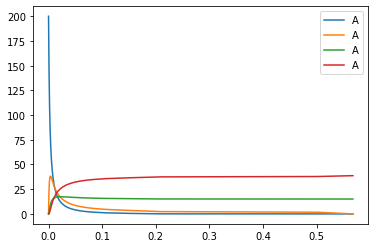

In [20]:
nodes_list = ['A','B','AB']
#nodes_list = ['AB','BMS','ABS','AMS','ABMS','AM','BM','MS']
optim.plot_observable(0,nodes_list)



**After 750 optimization iterations**


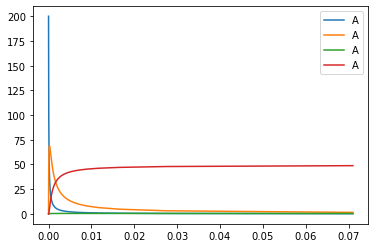

In [21]:

optim.plot_observable(-1,nodes_list)


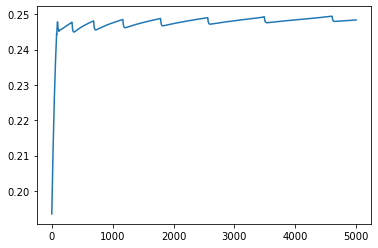

In [22]:
optim.plot_yield()

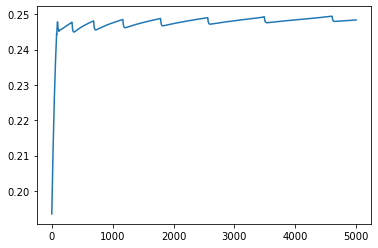

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(optim.yield_per_iter)

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Using CPU
Next time:  tensor(8.1616e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU
Next time:  tensor(8.1616e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU


No handles with labels found to put in legend.


Next time:  tensor(8.1616e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU
Next time:  tensor(8.1616e+11, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.


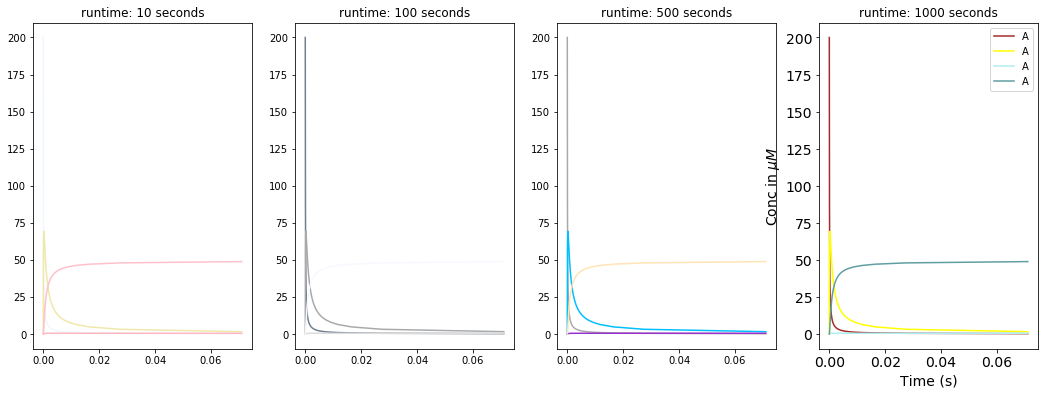

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 4)
optim_rn = optim.rn
for i, runtime in enumerate([10, 100, 500,1000]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i])
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
plt.show()

In [25]:
# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         kon_max = -1
#         next_node = -1

#         kon_sum = 0
#         total_flux_outedges = 0
#         total_flux_inedges = 0
#         if len(edges)==0:
#             return(False)
            
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
             
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

        
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
    
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")
#     print("|                                                                             |")
#     node_flux = get_node_flux(n)
#     net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#     print("|                                                                             |")
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")

# print(pathway)
# print(kon_sumarray)

# #print(total_con_rate)

In [26]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

tensor([4.2817e-01, 4.2817e-01, 3.8858e-16, 4.9681e+01], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
Parameter containing:
tensor([48.6184,  0.2884,  7.8622,  7.5845], dtype=torch.float64,
       requires_grad=True)


In [27]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

NameError: name 'solution' is not defined

In [ ]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 